In [1]:

%matplotlib inline
import os
import sys
import numpy 
import pandas 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# !pip install plotly

# imports regression library
# OLS: ordinary least squares (estimation technique used to estimate the linear regression model)
import statsmodels.api as sm
from statsmodels.formula.api import ols
    
# Set some Pandas options
pandas.set_option('display.notebook_repr_html', True)
pandas.set_option('display.max_columns', 20)
pandas.set_option('display.max_rows', 50)

from decimal import getcontext, Decimal
# Set the precision.
getcontext().prec = 2

In [2]:
os.chdir('C:\\Users\\Dean\\Documents\\Analytics\\4P94-master\\07-derived_statistics')

In [3]:
dm = pandas.read_csv('shots.csv')
dm = dm[(dm['advantagetypeshooter']=='EV')] 
dm = dm[dm['zone']=="O"]

In [4]:
dm['isgoal'] = dm['eventtype']=='GOAL'
dm['XNormAdj'] = 99 - dm['XNorm']

In [5]:
dm['XNormAdj'] = dm['XNormAdj'] + 1
dm['YNormAdj'] = numpy.absolute(dm['YNorm'])
dm['YNormAdj'] = dm['YNormAdj'] + 1

dm['lnX'] = numpy.log(dm['XNormAdj'])
dm['lnY'] = numpy.log(dm['YNormAdj'])

dm['dscore'] = dm['tgoals'] - dm['ogoals']
dm['oteamcode'] = dm.apply(lambda x: 1 if (x['teamcode'] == x['hteamcode']) else x['vteamcode'], axis=1)

In [6]:
dw = dm[dm['shotType']=='Slap']

# Slap Shot Data

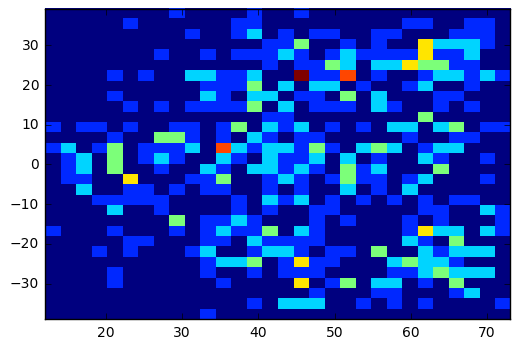

In [7]:
dg = dw[dw['eventtype']=='GOAL']

plt.hist2d(dg['XNormAdj'], dg['YNorm'],bins=30)
plt.show()

Optimization terminated successfully.
         Current function value: 0.188123
         Iterations 7
        Logit Marginal Effects       
Dep. Variable:                 isgoal
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
lnX           -0.0633      0.006    -11.380      0.000        -0.074    -0.052


C:\Users\Dean\Anaconda2\lib\site-packages\pandas\core\indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Dean\Anaconda2\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


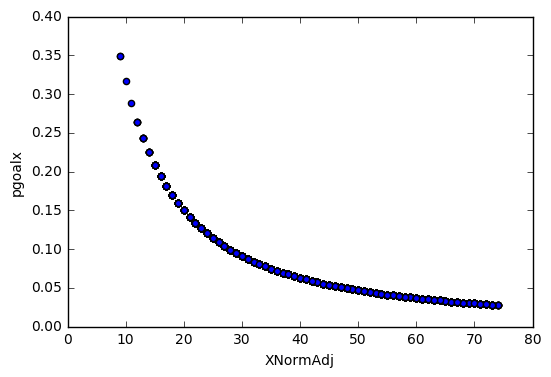

In [8]:
m1 = sm.Logit(dw['isgoal'], sm.add_constant(dw['lnX'])).fit()
print m1.get_margeff(method='dydx', at='overall').summary()

# Generate predicted values and predict results
dw.ix[:, 'pgoalx'] = m1.predict()
dw.plot(kind='scatter',x='XNormAdj', y='pgoalx')

Each percent increase in length from the net decreases the probability of a goal by 0.05

### Modelling the probability that a shot results in a goal given the width

In [9]:
m3 = sm.Logit(dw['isgoal'], sm.add_constant(dw[['lnX', 'lnY']])).fit()
print m3.get_margeff(method='dydx', at='overall').summary()
dw.ix[:, 'pgoal'] = m3.predict()

Optimization terminated successfully.
         Current function value: 0.185000
         Iterations 7
        Logit Marginal Effects       
Dep. Variable:                 isgoal
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
lnX           -0.0567      0.005    -10.386      0.000        -0.067    -0.046
lnY           -0.0194      0.002     -8.604      0.000        -0.024    -0.015


Each percent increase in length and width decreases the probability of a goal by 0.046 and 0.015, respectively.


In [10]:
# season
dw.groupby(['season'])[['isgoal', 'pgoal']].sum()

,isgoal,pgoal
season,,
2011,545.0,545.0


# Backhand Data

In [16]:
db = dm[dm['shotType']=='Backhand']

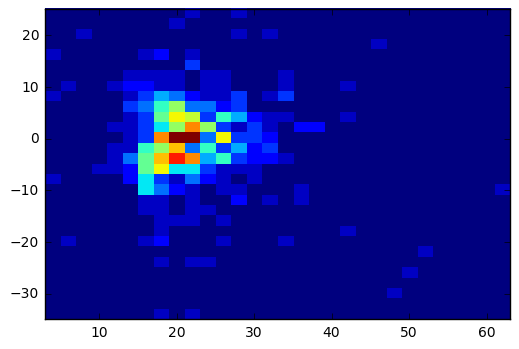

In [18]:
dg2 = db[db['eventtype']=='GOAL']

plt.hist2d(dg2['XNormAdj'], dg2['YNorm'],bins=30)
plt.show()

In [19]:
m1 = sm.Logit(dw['isgoal'], sm.add_constant(dw['lnX'])).fit()
print m1.get_margeff(method='dydx', at='overall').summary()

# Generate predicted values and predict results
db.ix[:, 'pgoalx'] = m1.predict()
db.plot(kind='scatter',x='XNormAdj', y='pgoalx')

Optimization terminated successfully.
         Current function value: 0.188123
         Iterations 7
        Logit Marginal Effects       
Dep. Variable:                 isgoal
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
lnX           -0.0633      0.006    -11.380      0.000        -0.074    -0.052


ValueError: Must have equal len keys and value when setting with an iterable

In [20]:
m3 = sm.Logit(db['isgoal'], sm.add_constant(db[['lnX', 'lnY']])).fit()
print m3.get_margeff(method='dydx', at='overall').summary()
db.ix[:, 'pgoal'] = m3.predict()

Optimization terminated successfully.
         Current function value: 0.297700
         Iterations 7
        Logit Marginal Effects       
Dep. Variable:                 isgoal
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
lnX           -0.0902      0.014     -6.341      0.000        -0.118    -0.062
lnY           -0.0683      0.005    -13.777      0.000        -0.078    -0.059


Each percent increase in length and width decreases the probability of a goal by 0.062 and 0.059, respectively.